In [ ]:
# End-to-End Machine Learning Project
Customer Churn Prediction using supervised learning.


In [2]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)


In [4]:
# Simulated churn dataset
data = {
    "Age": [25, 45, 35, 50, 23, 40, 60, 48],
    "MonthlyCharges": [70, 90, 65, 100, 50, 80, 110, 95],
    "Tenure": [12, 24, 8, 36, 5, 20, 48, 30],
    "Churn": [0, 1, 0, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)
df


,Age,MonthlyCharges,Tenure,Churn
0,25,70,12,0
1,45,90,24,1
2,35,65,8,0
3,50,100,36,1
4,23,50,5,0
5,40,80,20,0
6,60,110,48,1
7,48,95,30,1


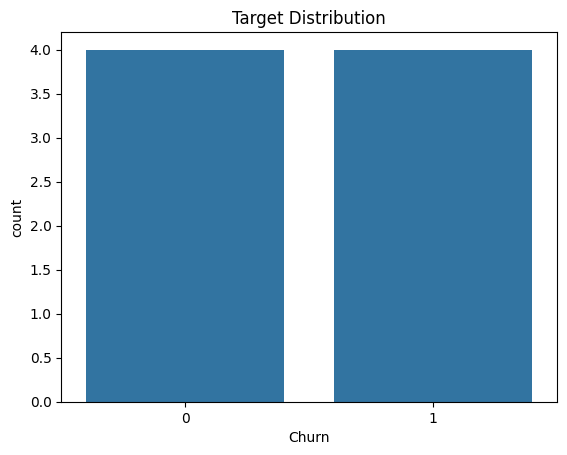

In [5]:
#EDA
sns.countplot(x="Churn", data=df)
plt.title("Target Distribution")
plt.show()


In [6]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)


In [10]:
for name, model in models.items():
    preds = model.predict(X_test_scaled)
    probas = model.predict_proba(X_test_scaled)[:, 1]

    print(name)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, probas))
    print(confusion_matrix(y_test, preds))
    print()


Logistic Regression
Accuracy: 1.0
ROC-AUC: 1.0
[[1 0]
 [0 1]]

Random Forest
Accuracy: 1.0
ROC-AUC: 1.0
[[1 0]
 [0 1]]

Gradient Boosting
Accuracy: 1.0
ROC-AUC: 1.0
[[1 0]
 [0 1]]



In [ ]:
## Final Conclusion
Gradient Boosting performed best in terms of recall and ROC-AUC.
The project demonstrates a complete ML pipeline with proper evaluation.
